2.2.1 オブジェクト指向のパーセプトロンAPI

In [1]:
import numpy as np

class Perceptron:
    """パーセプトロン分類器
    パラメータ    
    eta: 学習率
    n_iter: 訓練回数
    random_state: 乱数シード
    
    属性
    w_: 適合後の重み
    b_: 適合後のバイアス
    errors_: 各エポックの誤分類数
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """訓練データの学習
        パラメータ numpy配列
        X: shape = [n_examples, n_features]
         n_examplesは訓練データ数, n_featuresは特徴量の個数
        y: shape = [n_exapmles] 
        
        戻り値:self
        """
        rgen = np.random.RandomState(self.random_state) # np.random_randomStateは乱数生成器, self.random_stateでシード値設定
        # _は学習によって得られる値を指す
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # 平均0, 分散0.01の正規分布で重みを初期化
        self.b_ = np.float_(0.) # バイアスの初期化, NumPy型にそろえるための記法
        self.errors_ = []
        for _ in range(self.n_iter): # n_iterの数だけ学習を繰り返す
            errors = 0
            for xi, target in zip(X, y): #重みの更新
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                #深層学習のチェーンルールの式のパーセプトロン(離散型)バージョンになってる
                errors += int(update != 0.0) # 誤差を追加
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # 総入力を計算
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        #予測を返す
        return np.where(self.net_input(X) >= 0.0, 1, 0) # where(条件, 条件を満たすなら, 満たさないなら)
    
                
        

2.2.2 Irisデータセットでのパーセプトロンモデルの訓練

In [2]:
# データの読み込み
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<function matplotlib.pyplot.show(close=None, block=None)>

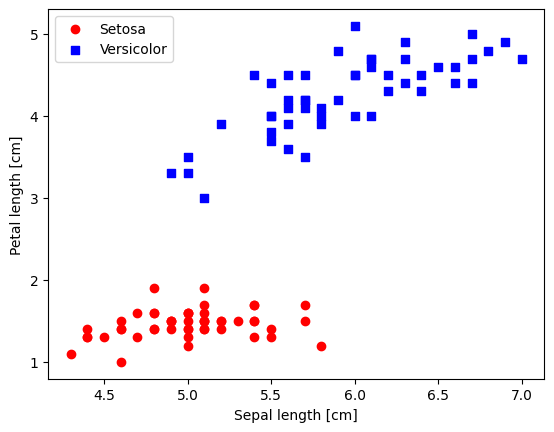

In [3]:
# データの可視化
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 0~100行目の目的変数の抽出
y = np.where(y=='Iris-setosa', 0, 1) # Iris-setosaを0,Iris-virginicaを1に
X = df.iloc[0:100, [0, 2]].values # 0~100行目の説明変数(1,3行目)の抽出

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa') #(がく片の長さ、花弁の長さ)をプロット
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')

plt.legend(loc='upper left')
plt.show


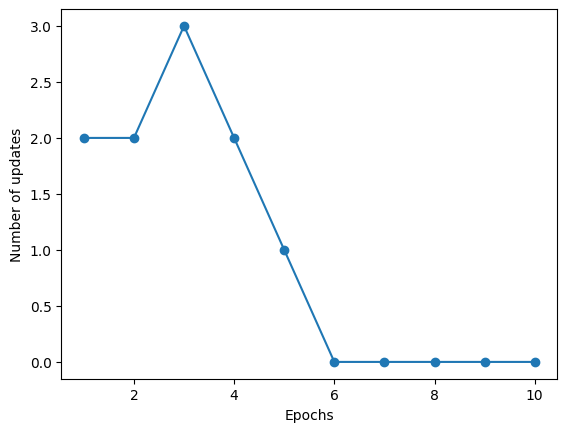

In [4]:
# パーセプトロンオブジェクトの生成
ppn = Perceptron(eta=0.1, n_iter=10)
# 訓練データの学習
ppn.fit(X, y)
# エポックと誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
# 軸のラベル設定
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [5]:
# 二次元決定境界の可視化
from matplotlib.colors import ListedColormap # カラーマップを自作するため

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # unique(y) はyの値の種類数を返す
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 図を塗りつぶすために縦横それぞれ1メモリ0.02の大きさの区画を作る
    
    # 各点の分類を予測
    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T) # revel→行列を横一列の配列に、np.array→2×n行列に、T→転置
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    lab = lab.reshape(xx1.shape)
    # グリッドポイントの境界線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) #(x座標,y座標,高さ(0,1),透明度,カラーマップ) 等高線の気分で引いている
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)): # enumerate インデックス番号と要素
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')



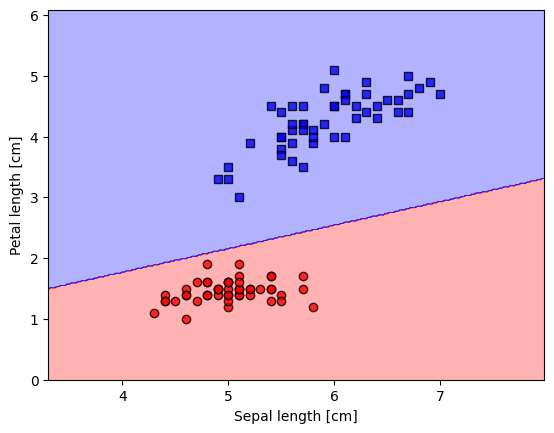

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()

2.3.2 ADALINEをPythonで実装する

In [11]:
import numpy as np

class AdalineGD:
    """ADAptive LInear NEuron分類器
    パラメータ    
    eta: 学習率
    n_iter: 訓練回数
    random_state: 乱数シード
    
    属性
    w_: 適合後の重み
    b_: 適合後のバイアス
    losses_: 各エポックでのMSE誤差
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """訓練データの学習
        パラメータ numpy配列
        X: shape = [n_examples, n_features]
         n_examplesは訓練データ数, n_featuresは特徴量の個数
        y: shape = [n_exapmles] 
        
        戻り値:self
        """
        rgen = np.random.RandomState(self.random_state) # np.random_randomStateは乱数生成器, self.random_stateでシード値設定
        # _は学習によって得られる値を指す
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # 平均0, 分散0.01の正規分布で重みを初期化
        self.b_ = np.float_(0.) # バイアスの初期化, NumPy型にそろえるための記法
        self.losses_ = []
        for i in range(self.n_iter): # n_iterの数だけ学習を繰り返す
            # 活性化関数を通す
            output = self.activation(self.net_input(X))
            # 誤差を計算
            errors = (y - output)
            # 重みの更新
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean() 
            
            # 損失関数の計算
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
     
    
    def net_input(self, X):
        # 総入力を計算
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        "活性化関数の出力を計算"
        return X
    
    def predict(self, X):
        #予測を返す
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0) # where(条件, 条件を満たすなら, 満たさないなら)
    
                
        

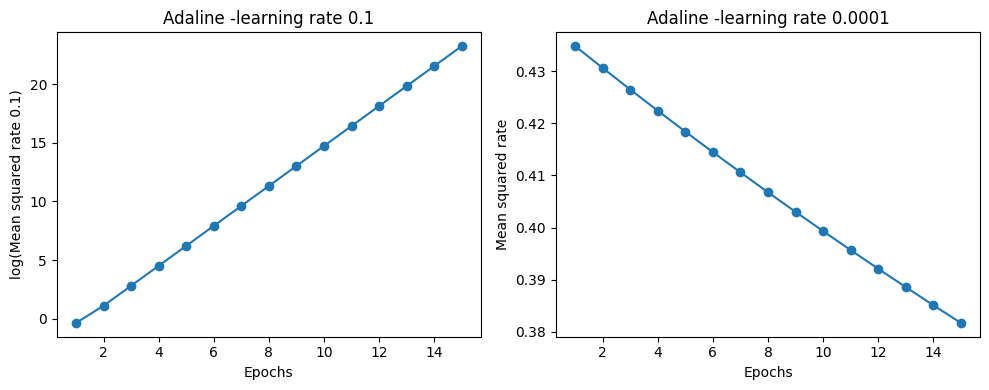

In [12]:
# 学習率の違いによるエポック数に対する損失関数のプロットの変化
# 描画領域の分割
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
# adalineの学習
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X,y)
#エポックスト損失関数の関係を表す折れ線グラフのプロット
ax[0].plot(range(1, len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
# 軸ラベルの設定
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel('log(Mean squared rate 0.1)')
# タイトルの設定
ax[0].set_title('Adaline -learning rate 0.1')

# adalineの学習
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X,y)
#エポックスト損失関数の関係を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.losses_)+1), ada2.losses_, marker='o')
# 軸ラベルの設定
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel('Mean squared rate')
# タイトルの設定
ax[1].set_title('Adaline -learning rate 0.0001')
plt.tight_layout()
plt.show()





In [13]:
# データの標準化
X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

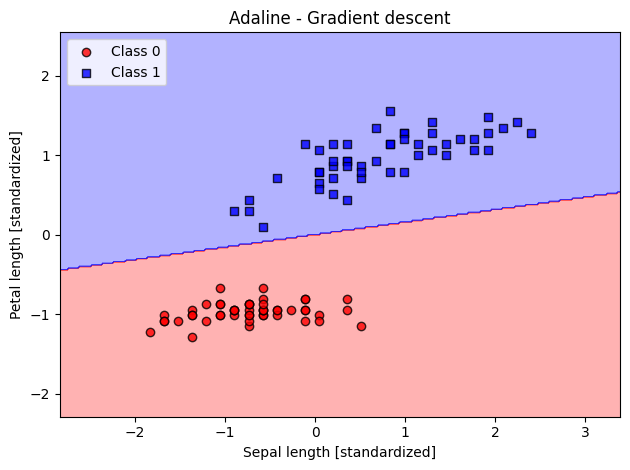

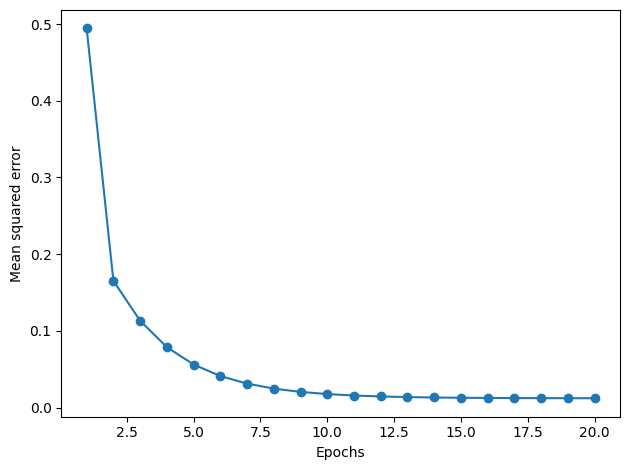

In [14]:
# 勾配効果法によるADALINEの学習(標準化後、学習率eta=0.5)
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

# 決定領域のプロット
plot_decision_regions(X_std, y, classifier=ada_gd)
# タイトルの設定
plt.title('Adaline - Gradient descent')
# 軸ラベルの設定
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_)+1), ada_gd.losses_, marker='o')
# 軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
# 図の表示
plt.tight_layout()
plt.show()

2.3.4 確率的勾配降下法

In [17]:
class AdalineSGD:
    """ADAptive LInear NEuron分類器
    パラメータ
    -----------
    eta : float
      学習率
    n_iter : int 
      訓練データの訓練回数
    shuffle : bool (デフォルト: True)
      Trueの場合は循環を回避するためにエポックごとに訓練データをシャッフル
    random_state : int
      乱数シード
      
    属性
    -------
    w_ : 一次元配列
      適合後の重み
    b_ : スカラー
      適合後の倍亜種ニット
    losses_ : リスト
      各エポックで全ての訓練データの平均を求めるMSE損失関数
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False # 重みの初期化フラグはFalseに設定
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle: # 指定があればシャッフル
                X, y = self._shuffle(X, y)
                losses = []
                for xi, target in zip(X, y):
                    # 特徴量xiと目的変数targetを使った重みの更新と損失の計算
                    losses.append(self._update_weights(xi, target))
                # 訓練データの平均損失の計算
                avg_loss = np.mean(losses)
                # 平均損失を格納
                self.losses_.append(avg_loss)
        return self
    
    
    def partial_fit(self, X, y):
        """重みを再初期化することなく訓練データに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        # 目的変数yの要素数が2以上の場合は各訓練データの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1: # ravel(): 2次元配列を1次元配列に
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 要素数が1の場合は訓練データ全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self                    
                
    def _shuffle(self, X, y):
        """訓練データをシャッフル"""
        r = self.rgen.permutation(len(y)) # インデックスの配列を生成
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを乱数で初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True # 一度初期化したので
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を使って重みを更新"""
        output = self.activation(self.net_input(xi)) # 活性化関数の出力を計算
        error = (target - output)                    # 誤差
        self.w_ += self.eta * 2.0 * xi * (error)     # 重みの更新
        self.b_ += self.eta * 2.0 * error            # バイアスの更新
        loss = error**2                              # 損失値を計算
        return loss
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)    
    

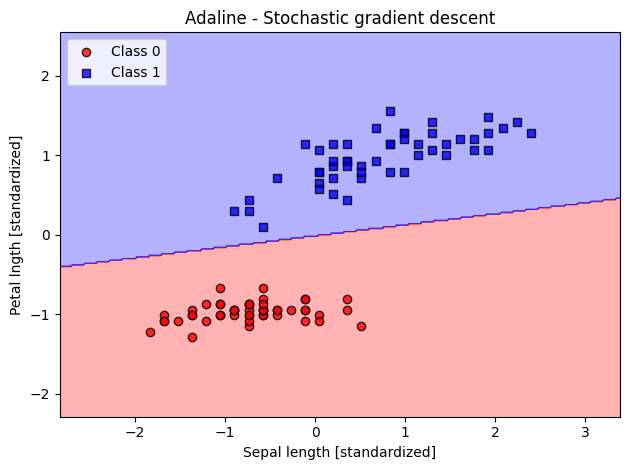

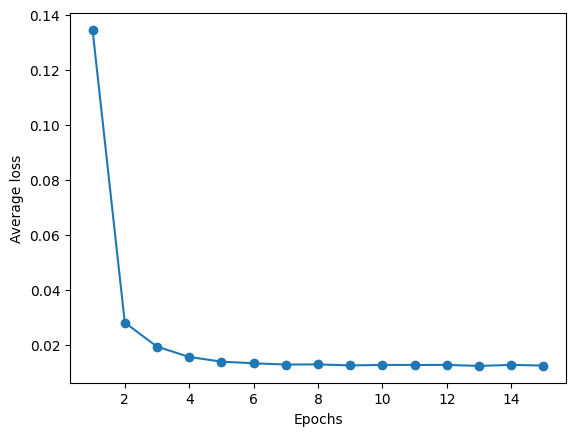

In [18]:
# 確率的勾配降下法によるADALINEの学習
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

# モデルへの適合
ada_sgd.fit(X_std, y)

# 決定領域のプロット
plot_decision_regions(X_std, y, classifier=ada_sgd)

# 設定
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal lngth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

# 表示
plt.show()

# エポックと損失値の折れ線グラフのプロット
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')

# 軸のラベル設定
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout
plt.show()